---

# 프로그래밍III 프로젝트

## 카드소비동향

####      <div style="text-align:right">산업데이터사이언스학부 </div> <br>
<div style="text-align:right">201704232 이진수 </div>

### 코로나 19 전후 소비 변화<br>
https://www.findatamall.or.kr/fsec/dataProd/generalDataProdDetail.do?cmnx=44&goods_id=bfd027d0-d6eb-11ea-a506-cf31c4c94055
##### 보험, 통신요금, 자동이체, 제약, 세금, 온라인 업종은 제외
#### 카드의 어느 업종 관련 혜택이 있으면 더 고객이 많이 사용할까?
#### 2019년 3-6월과 2020년 3-6월 비교 (코로나19 1차 유행이 시작한 다음달)


In [1]:
import pandas as pd
import numpy as np

In [2]:
Credit = pd.read_csv("Credit.csv",encoding='UTF-8')
Credit.head()

,이용일자,업종대분류,카드결제건수
0,20190101,가전/가구,149
1,20190101,가정생활/서비스,189
2,20190101,교육/학원,142
3,20190101,미용,464
4,20190101,스포츠/문화/레저,1752


In [3]:
Credit = (Credit.rename(columns={
    '업종대분류':'업종',
    '카드결제건수':'결제량'}))
Credit

,이용일자,업종,결제량
0,20190101,가전/가구,149
1,20190101,가정생활/서비스,189
2,20190101,교육/학원,142
3,20190101,미용,464
4,20190101,스포츠/문화/레저,1752
...,...,...,...
5533,20200630,음/식료품,1549
5534,20200630,의료,2887
5535,20200630,자동차,418
5536,20200630,주유,2008


---

### 2019년도 3월-6월과 2020년 3월-6월사이의 카드사용량 데이터

In [4]:
Credit_2019 = Credit.이용일자.between(2019_03_01,2019_06_30)
Credit_2020 = Credit.이용일자.between(2020_03_01,2020_06_30)
Credit_u = ~(Credit['업종']=='유통')
#유통을 뺀 이유 :  창고업, 운송업 같은 업종이라 생각해서

In [5]:
Credit_19 = Credit_2019 & Credit_u
Credit_20 = Credit_2020 & Credit_u

In [6]:
cols= ['이용일자','업종','결제량']

In [7]:
Cred_19 = Credit.loc[Credit_19,cols]
Cred_19

,이용일자,업종,결제량
767,20190301,가전/가구,231
768,20190301,가정생활/서비스,387
769,20190301,교육/학원,271
770,20190301,미용,767
771,20190301,스포츠/문화/레저,2212
...,...,...,...
2348,20190630,음/식료품,1356
2349,20190630,의료,446
2350,20190630,자동차,253
2351,20190630,주유,1975


In [8]:
Cred_20 = Credit.loc[Credit_20,cols]
Cred_20

,이용일자,업종,결제량
3952,20200301,가전/가구,116
3953,20200301,가정생활/서비스,156
3954,20200301,교육/학원,98
3955,20200301,미용,310
3956,20200301,스포츠/문화/레저,1150
...,...,...,...
5533,20200630,음/식료품,1549
5534,20200630,의료,2887
5535,20200630,자동차,418
5536,20200630,주유,2008


In [9]:
Cre_19= Cred_19.groupby("업종")["결제량"].sum()
Cre_20= Cred_20.groupby("업종")["결제량"].sum()

In [10]:
Cre_19

업종
가전/가구          39269
가정생활/서비스       70901
교육/학원          46779
미용             66369
스포츠/문화/레저     194693
여행/교통          24950
요식/유흥        1409691
음/식료품         190369
의료            307277
자동차            47768
주유            264078
패션/잡화          60764
Name: 결제량, dtype: int64

In [11]:
Cre_20

업종
가전/가구          35974
가정생활/서비스       70900
교육/학원          36957
미용             51139
스포츠/문화/레저     154283
여행/교통          14549
요식/유흥        1235652
음/식료품         198949
의료            313388
자동차            44100
주유            237359
패션/잡화          50059
Name: 결제량, dtype: int64

---

### 데이터 시각화

In [12]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='업종'>

C:\Users\LEe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LEe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LEe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LEe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LEe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LEe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54876 missing from current font.

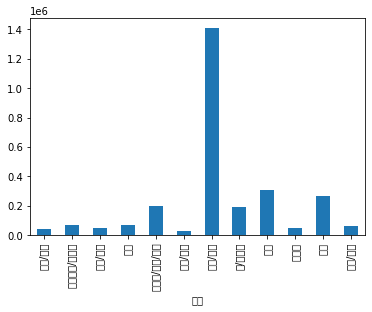

In [13]:
Cre_19.plot(kind="bar",fontsize=10)

In [14]:
#한글 깨지는 현상을 막기 위해 폰트 변경
plt.rcParams['font.family'] = 'Malgun Gothic'

<AxesSubplot:ylabel='업종'>

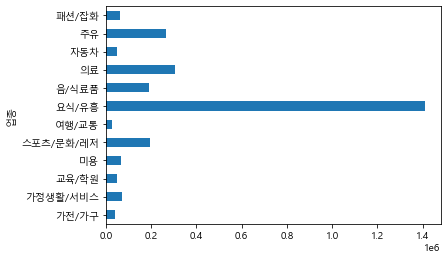

In [15]:
Cre_19.plot(kind="barh",fontsize=10)

<AxesSubplot:ylabel='업종'>

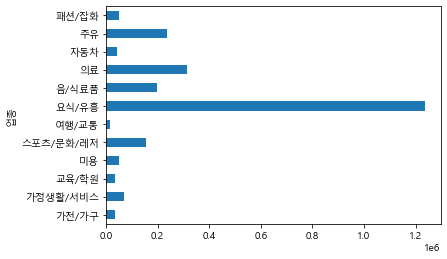

In [16]:
Cre_20.plot(kind="barh",fontsize=10)

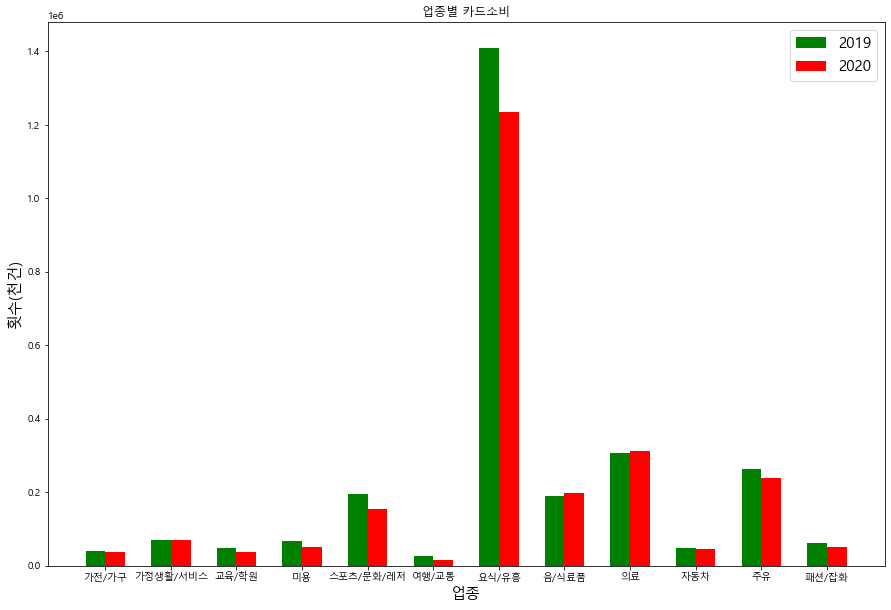

In [19]:
c = (['가전/가구','가정생활/서비스','교육/학원','미용','스포츠/문화/레저'
      ,'여행/교통','요식/유흥','음/식료품','의료','자동차','주유','패션/잡화'])
index=np.arange(len(c))
bar_width = 0.3

fig, ax = plt.subplots(figsize=(15, 10))

plt.bar(index,Cre_19,color='g',width=bar_width,label='2019')
plt.bar(index+ bar_width,Cre_20,color='r',width=bar_width,label='2020')
plt.legend(fontsize=15) #범례 표시
plt.xticks(index+0.15, c) # x축 값 설정
plt.xlabel('업종',fontsize=15) # x축 레이블 설정
plt.ylabel('횟수(천건)',fontsize=15) # y축 레이블 설정
plt.title('업종별 카드소비') #그래프 제목 설정
plt.show()

### 2019년보다 증가한 것 : 음/식료품,  의료
### 카드사에서 음/식료품과 의료 쪽 관련 혜택이 좋아지면 고객이 많아질 것이라 생각된다.